In [167]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [169]:
import fasttext
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [170]:
!pip install stopwords

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [172]:
!pip install fasttext

In [173]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [174]:
df.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


Text(0.5, 1.0, 'Sentiment distribution')

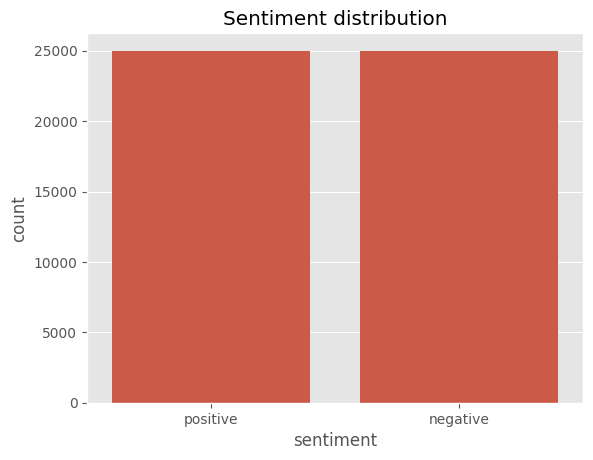

In [175]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [176]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [177]:
df['word count'] = df['review'].apply(no_of_words)

In [178]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [179]:
myText = df.review[4]
myText


'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [180]:
text = re.sub(r'[^\w\s\']',"",myText)
text

"Petter Mattei's Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money power and success do to people in the different situations we encounter br br This being a variation on the Arthur Schnitzler's play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has a sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitatbr br The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits A big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encount

In [181]:
import re

In [182]:
def preProcessing(text):
    # text = re.sub('<br />', '', text)
    # text = re.sub(r'[^\w\s\']',"",text)
    # text = re.sub(' +',' ',text).lower()
    # return text
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [183]:
!pip install punkt

ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [184]:
preProcessing(myText)

'petter matteis love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzlers play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitatthe thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounterthe acting good mr matteis direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alivewe wish mr mattei good luck await anxiously next work'

In [185]:
df['processed_review'] = df['review'].map(preProcessing)

In [186]:
df.head(1)

,review,sentiment,word count,processed_review
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching 1 oz episode ...


In [187]:
# stemmer = PorterStemmer()
# def stemming(data):
#     text = [stemmer.stem(word) for word in data]
#     return data

In [188]:
# df.review = df['review'].apply(lambda x: stemming(x))

In [189]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count,processed_review
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love time money visually stunni...


In [190]:
df['final_data'] = "__label__"+df['sentiment']+" "+df['processed_review']

In [191]:
df.head(1)

,review,sentiment,word count,processed_review,final_data
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching 1 oz episode ...,__label__positive one reviewers mentioned watc...


In [192]:
df.shape

(50000, 5)

In [193]:
df.head(1)

,review,sentiment,word count,processed_review,final_data
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching 1 oz episode ...,__label__positive one reviewers mentioned watc...


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
train, test = train_test_split(df, test_size=0.3)

In [196]:
display(train.shape)
display(test.shape)

(35000, 5)

(15000, 5)

In [197]:
train.to_csv("train_reviews.csv",columns=['final_data'],index=False,header=False)
test.to_csv("test_reviews.csv",columns=['final_data'],index=False,header=False)

In [198]:
myModel = fasttext.train_supervised(input="train_reviews.csv")

train,test,predict,presicion

In [199]:
myModel.test("test_reviews.csv")

(15000, 0.8882, 0.8882)

In [200]:
myModel.predict("I loved the movie")

(('__label__positive',), array([1.00001001]))

In [201]:
myModel.predict("The movie was pathetic")

(('__label__negative',), array([1.00001001]))

In [202]:
myModel.predict("This a fantastic movie of three prisoners who become famous. One of the actors is george clooney and I'm not a fan but this roll is not bad. Another good thing about the movie is the soundtrack (The man of constant sorrow). I recommand this movie to everybody. Greetings Bart")

(('__label__positive',), array([0.99851513]))

In [203]:
df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

In [204]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

,review,sentiment,word count,processed_review,final_data
0,One of the other reviewers has mentioned that ...,1,307,one reviewers mentioned watching 1 oz episode ...,__label__positive one reviewers mentioned watc...
1,A wonderful little production. <br /><br />The...,1,162,wonderful little production filming technique ...,__label__positive wonderful little production ...
2,I thought this was a wonderful way to spend ti...,1,166,thought wonderful way spend time hot summer we...,__label__positive thought wonderful way spend ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,petter matteis love time money visually stunni...,__label__positive petter matteis love time mon...
5,"Probably my all-time favorite movie, a story o...",1,119,probably alltime favorite movie story selfless...,__label__positive probably alltime favorite mo...


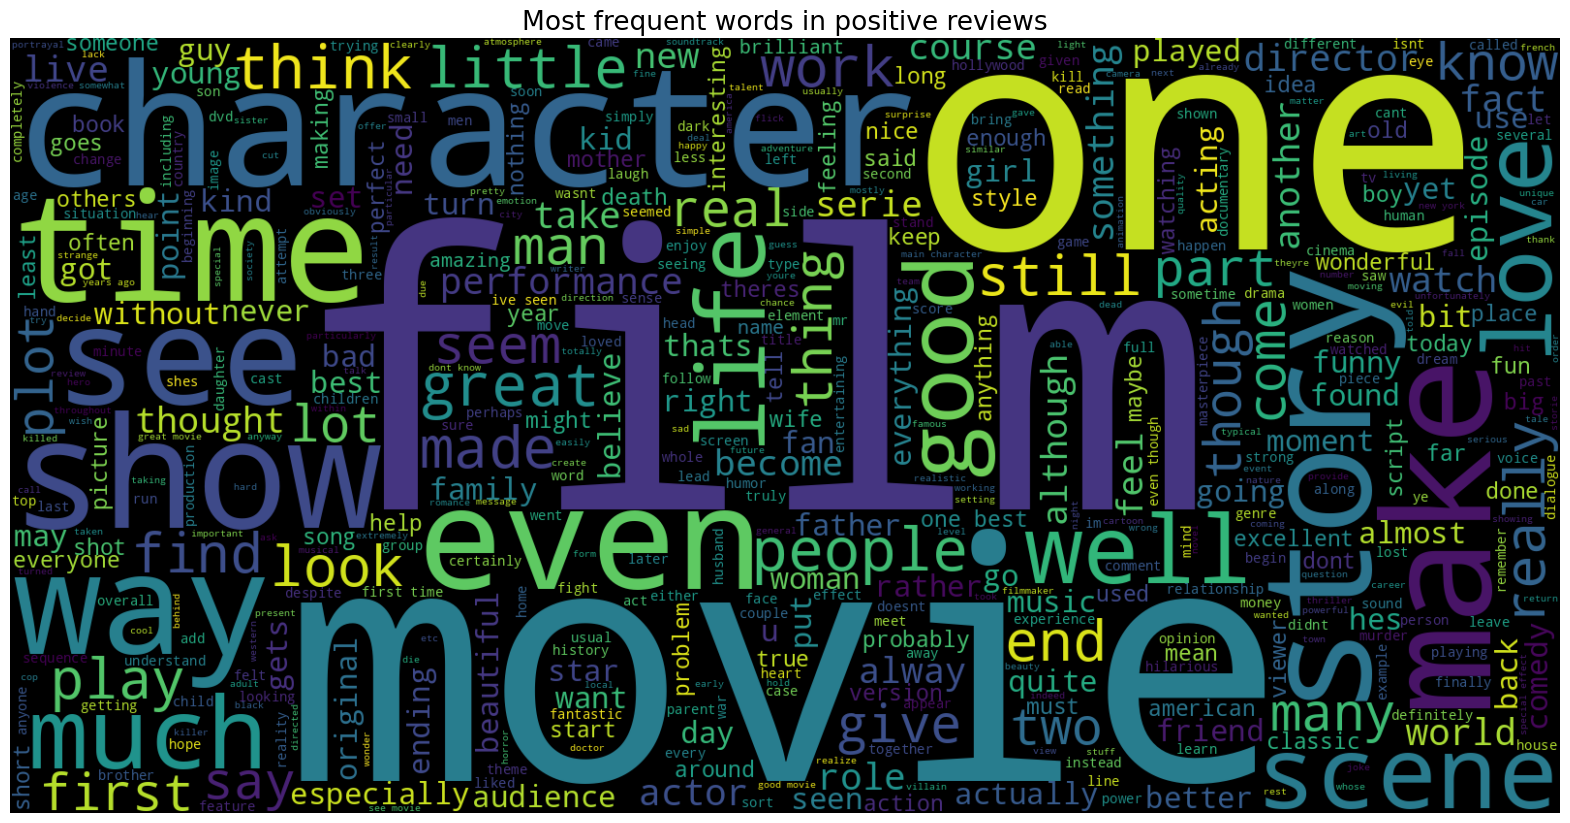

In [205]:
text = ' '.join([word for word in pos_reviews['processed_review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [206]:
from collections import Counter
count = Counter()
for text in pos_reviews['processed_review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39419),
 ('movie', 36019),
 ('one', 25730),
 ('like', 17055),
 ('good', 14342),
 ('great', 12643),
 ('story', 12372),
 ('see', 11865),
 ('time', 11771),
 ('well', 10973),
 ('really', 10674),
 ('also', 10549),
 ('would', 10368),
 ('even', 9363),
 ('much', 8996)]

In [207]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39419
1,movie,36019
2,one,25730
3,like,17055
4,good,14342


In [208]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')

In [209]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count,processed_review,final_data
3,Basically there's a family where a little boy ...,0,138,basically theres family little boy jake thinks...,__label__negative basically theres family litt...
7,"This show was an amazing, fresh & innovative i...",0,174,show amazing fresh innovative idea 70s first a...,__label__negative show amazing fresh innovativ...
8,Encouraged by the positive comments about this...,0,130,encouraged positive comments film looking forw...,__label__negative encouraged positive comments...
10,Phil the Alien is one of those quirky films wh...,0,96,phil alien one quirky films humour based aroun...,__label__negative phil alien one quirky films ...
11,I saw this movie when I was about 12 when it c...,0,180,saw movie 12 came recall scariest scene big bi...,__label__negative saw movie 12 came recall sca...


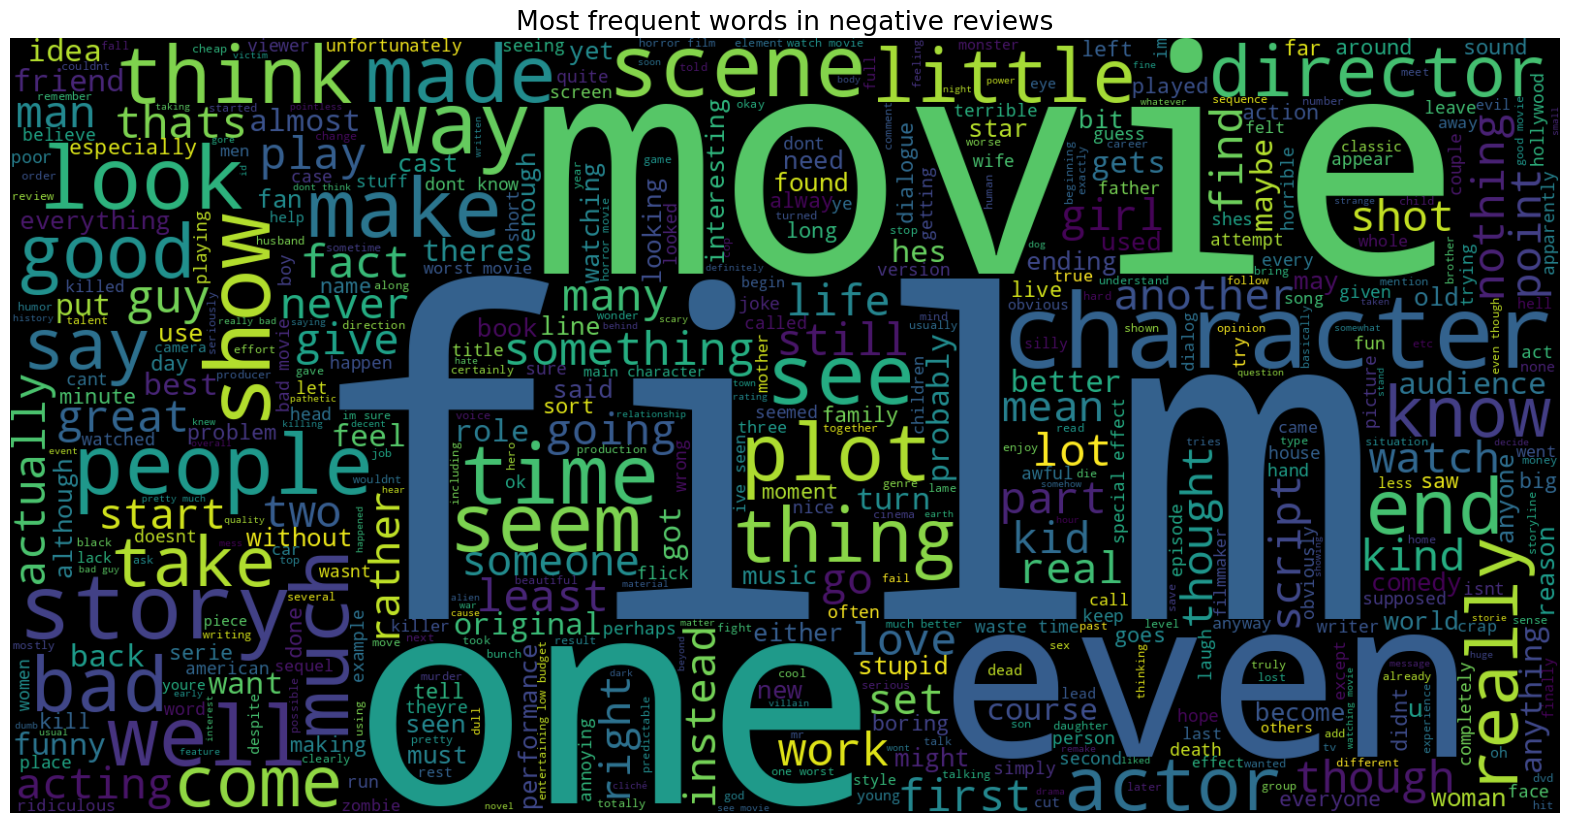

In [210]:
text = ' '.join([word for word in neg_reviews['processed_review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [211]:
count = Counter()
for text in neg_reviews['processed_review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47489),
 ('film', 35042),
 ('one', 24636),
 ('like', 21771),
 ('even', 14918),
 ('good', 14141),
 ('bad', 14068),
 ('would', 13633),
 ('really', 12220),
 ('time', 11494),
 ('see', 10567),
 ('dont', 10029),
 ('get', 9996),
 ('much', 9898),
 ('story', 9672)]

In [212]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47489
1,film,35042
2,one,24636
3,like,21771
4,even,14918


In [213]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color='word')

In [214]:
train_data, test_data = train_test_split(df,test_size=0.2,random_state=42)

In [215]:
train_data.shape

(40000, 5)

In [216]:
test_data.shape

(10000, 5)

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [218]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen=200)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen=200)

In [219]:
print(x_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [220]:
print(x_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [221]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']

In [222]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [223]:
print(y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


In [224]:
model = Sequential()
model.add(Embedding(input_dim=5000,output_dim=128))
model.add(LSTM(128,dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

In [225]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [226]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [227]:
model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
250/250 [==============================] - 216s 855ms/step - loss: 0.4304 - accuracy: 0.7962 - val_loss: 0.2887 - val_accuracy: 0.8786
Epoch 2/5
250/250 [==============================] - 211s 846ms/step - loss: 0.2677 - accuracy: 0.8943 - val_loss: 0.2963 - val_accuracy: 0.8773
Epoch 3/5
250/250 [==============================] - 214s 855ms/step - loss: 0.2220 - accuracy: 0.9128 - val_loss: 0.3065 - val_accuracy: 0.8716
Epoch 4/5
250/250 [==============================] - 218s 870ms/step - loss: 0.1902 - accuracy: 0.9253 - val_loss: 0.3212 - val_accuracy: 0.8719
Epoch 5/5
250/250 [==============================] - 224s 897ms/step - loss: 0.1720 - accuracy: 0.9349 - val_loss: 0.3384 - val_accuracy: 0.8733


In [229]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 37s 119ms/step - loss: 0.3245 - accuracy: 0.8728


[0.32447633147239685, 0.8727999925613403]